In [99]:
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv("https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv")

In [101]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [102]:
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [103]:
df.duplicated().sum()

0

In [104]:
df.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [105]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [115]:
x = df.drop('Wine',axis = 1)
y = df['Wine']

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_std = scaler.fit_transform(x_train)
xtest_std = scaler.transform(x_test)

In [118]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

In [119]:
xtrain_pca = pca.fit_transform(xtrain_std)
xtest_pca = pca.transform(xtest_std)

In [120]:
pca.components_

array([[ 0.14733424, -0.25027499, -0.01252058, -0.23440896,  0.15738948,
         0.39369045,  0.41565632, -0.27414911,  0.33265958, -0.10517746,
         0.29234204,  0.38195327,  0.28245765],
       [-0.48989241, -0.23489249, -0.24612128,  0.09586839, -0.27341935,
        -0.05255799,  0.00246418, -0.02048056, -0.01293734, -0.55210635,
         0.28639953,  0.15726874, -0.38127621],
       [-0.12883943,  0.07837079,  0.66992589,  0.58400534,  0.1560393 ,
         0.14094797,  0.16225452,  0.246157  ,  0.0987407 , -0.06645383,
         0.08648691,  0.1650139 , -0.08593995],
       [-0.00430416,  0.57214455, -0.14859595, -0.00159674, -0.46748688,
         0.2494179 ,  0.20455709,  0.02664111,  0.38232679,  0.04257463,
        -0.32843972,  0.17934593, -0.19803577],
       [-0.3131694 ,  0.13950194, -0.10483182,  0.13720145,  0.58090619,
        -0.03182693, -0.06187123, -0.57311568,  0.20315816, -0.01118511,
        -0.30925364, -0.04846427, -0.20618114]])

In [130]:
(pca.explained_variance_ratio_)

array([0.36351132, 0.18633855, 0.11962996, 0.07588251, 0.0699779 ])

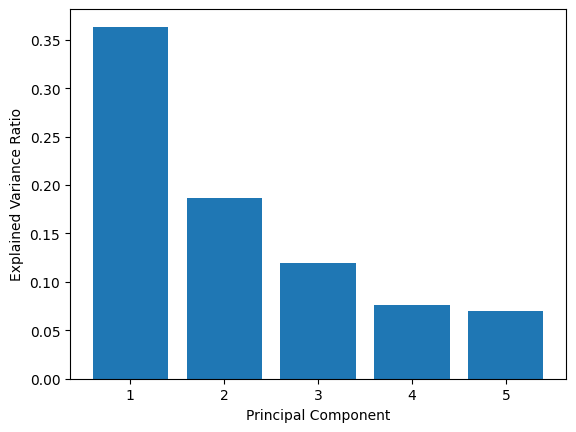

In [121]:
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

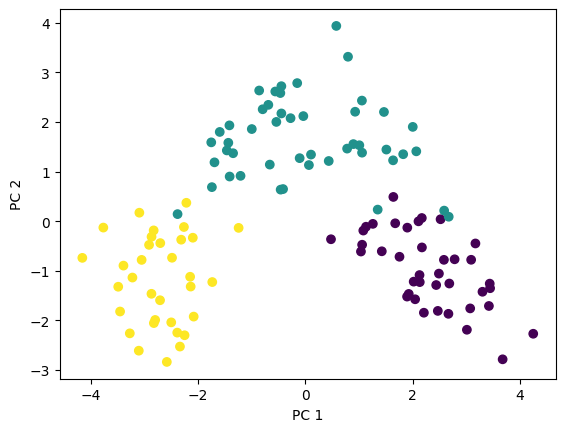

In [114]:
plt.scatter(xtrain_pca[:, 0], xtrain_pca[:, 1], c=y_train)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

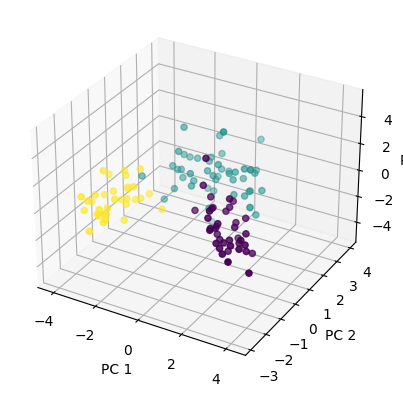

In [124]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xtrain_pca[:, 0], xtrain_pca[:, 1], xtrain_pca[:, 2], c=y_train)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

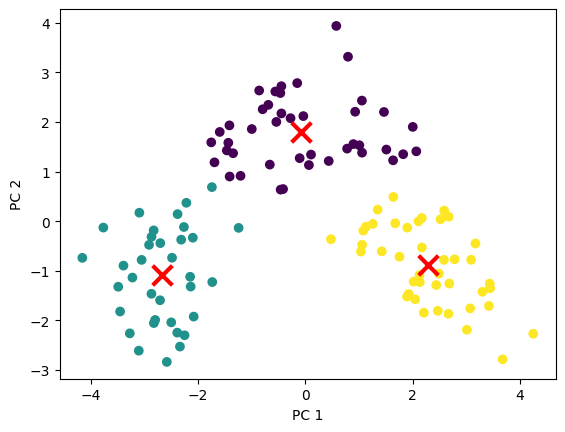

In [127]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(xtrain_pca)

# Visualize the clustering results
plt.scatter(xtrain_pca[:, 0], xtrain_pca[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()